## CodSoft Intern

## TASK 1 -  MOVIE GENRE CLASSIFICATION

### Create a machine learning model that can predict the genre of a movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

#### Dataset Link- https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
#importing libraries for visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [2]:
data_frame_description=pd.read_csv('description.txt')
data_frame_description

,Train data:
0,ID ::: TITLE ::: GENRE ::: DESCRIPTION
1,ID ::: TITLE ::: GENRE ::: DESCRIPTION
2,ID ::: TITLE ::: GENRE ::: DESCRIPTION
3,ID ::: TITLE ::: GENRE ::: DESCRIPTION
4,Test data:
5,ID ::: TITLE ::: DESCRIPTION
6,ID ::: TITLE ::: DESCRIPTION
7,ID ::: TITLE ::: DESCRIPTION
8,ID ::: TITLE ::: DESCRIPTION
9,Source:


In [3]:
data_frame_train=pd.read_csv('train_data.txt',sep=':::',names=['ID','TITLE', 'GENRE', 'DESCRIPTION'], engine='python')

In [4]:
data_frame_train.shape

(54214, 4)

In [5]:
data_frame_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
data_frame_train.columns

Index(['ID', 'TITLE', 'GENRE', 'DESCRIPTION'], dtype='object')

In [7]:
data_frame_train.head()

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [8]:
data_frame_train.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [9]:
data_frame_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,54214.0,27107.5,15650.378084,1.0,13554.25,27107.5,40660.75,54214.0


In [10]:
data_frame_train.GENRE.unique()

array([' drama ', ' thriller ', ' adult ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

In [11]:
data_frame_train.GENRE.value_counts()

GENRE
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

<Axes: xlabel='GENRE'>

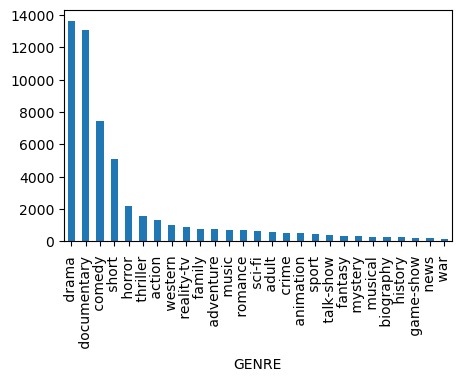

In [12]:
data_frame_train["GENRE"].value_counts().plot(kind="bar",figsize=(5,3))

In [13]:
data_frame_test=pd.read_csv('test_data.txt',sep=':::',names=['ID','TITLE','DESCRIPTION'], engine='python')

In [14]:
data_frame_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54200 entries, 0 to 54199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54200 non-null  int64 
 1   TITLE        54200 non-null  object
 2   DESCRIPTION  54200 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [15]:
data_frame_test.head()

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [16]:
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOP_WORDS= set(stopwords.words("english")) 

[nltk_data] Downloading package stopwords to C:\Users\Sanika
[nltk_data]     Pawar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [18]:
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()
nltk.download('punkt')

[nltk_data] Downloading package wordnet to C:\Users\Sanika
[nltk_data]     Pawar\AppData\Roaming\nltk_data...
[nltk_data] Downloading package punkt to C:\Users\Sanika
[nltk_data]     Pawar\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [19]:
from nltk.tokenize import word_tokenize
import re # For replacing any text if required

def Pre_process_text(act_string):
    # remove all values other than alphabets
    act_string= re.sub(r'[^a-zA-Z+]'," ", act_string)
    act_string = act_string.lower() # lowercasing text
    Token_words = word_tokenize(act_string) # to tokenize strings into words
    #Remove stop words and to return base form of a word
    new_string = [wordnet.lemmatize(word) for word in Token_words if not word in STOP_WORDS] # removing stopwords
    new_string = ' '.join(new_string)
    return new_string

In [20]:
data_frame_train['DESCRIPTION_cleaned'] = data_frame_train['DESCRIPTION'].apply(Pre_process_text)
data_frame_train.head()
     

,ID,TITLE,GENRE,DESCRIPTION,DESCRIPTION_cleaned
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,listening conversation doctor parent year old ...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,brother sister past incestuous relationship cu...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,bus empty student field trip museum natural hi...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,help unemployed father make end meet edith twi...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,film title refers un recovered body ground zer...


In [21]:
data_frame_test['DESCRIPTION_cleaned_test'] = data_frame_test['DESCRIPTION'].apply(Pre_process_text)
data_frame_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = .8)

## Support Vector Machine Classifier Model

In [34]:
from sklearn.svm import SVC
my_model_SVC= SVC(gamma='auto')

In [35]:
# Fitting the model in train data set ie SVC Model should learn from the on Train Data
my_model_SVC.fit(X_train, y_train)

SVC(gamma='auto')

In [36]:
y_pred_SVC = my_model_SVC.predict(X_test)
y_pred_SVC

array([' drama ', ' drama ', ' drama ', ..., ' drama ', ' drama ',
       ' drama '], dtype=object)

In [37]:
accuracy_score(y_test, y_pred_SVC)

0.24882412616434565

In [38]:
# Classification Report
print(classification_report(y_pred_SVC,y_test))

               precision    recall  f1-score   support

      action        0.00      0.00      0.00         0
       adult        0.00      0.00      0.00         0
   adventure        0.00      0.00      0.00         0
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.00      0.00      0.00         0
       crime        0.00      0.00      0.00         0
 documentary        0.00      0.00      0.00         0
       drama        1.00      0.25      0.40     10843
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         0
   game-show        0.00      0.00      0.00         0
     history        0.00      0.00      0.00         0
      horror        0.00      0.00      0.00         0
       music        0.00      0.00      0.00         0
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         0
        n

In [39]:
Genre_Predicted_Test_data= my_model_LR.predict(X_Test)
data_frame_test['Genre_Predicted'] = Genre_Predicted_Test_data
data_frame_test.head()

,ID,TITLE,DESCRIPTION,DESCRIPTION_cleaned_test,Genre_Predicted
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",l r brane love life car apartment job especial...,drama
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",spain march quico naughty child three belongin...,drama
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,one year life albin family shepherd north tran...,documentary
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",father died spoken brother year serious cancer...,drama
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,known internationally martial art superstar br...,drama
